In [74]:
from sklearn import metrics
from scipy import stats
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
sns.set_theme(style='whitegrid')
plt.rcParams["figure.figsize"] = (10,10)

def confidence_interval(data, size=10000, func=np.mean):
    """creates a bootstrap sample, computes replicates and returns replicates array"""
    # Create an empty array to store replicates
    bs_replicates = np.empty(size)
    
    np.random.seed(42)
    # Create bootstrap replicates as much as size
    for i in range(size):
        # Create a bootstrap sample
        bs_sample = np.random.choice(data,size=len(data))
        # Get bootstrap replicate and append to bs_replicates
        bs_replicates[i] = func(bs_sample)
    
    return np.percentile(bs_replicates, [2.5, 97.5])


path = "/home/kti01/Documents/My Files/Projects/Overlap/data/robustness"
ruler_type = '3'

ours = pd.read_csv(os.path.join(path, 'robustness_ours_r'+ruler_type+'.csv'))
normal = pd.read_csv(os.path.join(path, 'robustness_normal_r'+ruler_type+'.csv'))


In [75]:
shift = []
for idx, row in ours.iterrows():
    pred = row[['prediction']].item()
    norm =  row[['0_x', '1_x', '2_x', '3_x', '4_x', '5_x', '6_x', '7_x', '8_x', '9_x']].values
    arti =  row[['0_y', '1_y', '2_y', '3_y', '4_y', '5_y', '6_y', '7_y', '8_y', '9_y']].values
    if pred == 1:
        x = np.abs(norm - arti)
        #x = np.sort(x)[0:2]
        shift.append(x.mean())
        #i = norm.argmax()
        #x = np.abs(arti[i] - norm[i])
        #shift.append(x)
    else:
        x = np.abs(norm - arti)
        #x = np.sort(x)[0:2]
        shift.append(x.mean())
        #i = norm.argmax()
        #x = np.abs(arti[i] - norm[i])
        #shift.append(x)
        

In [76]:
df = pd.DataFrame({'baseline': (normal.normal-normal.artifact).abs(),
                  'our XAI': shift})

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

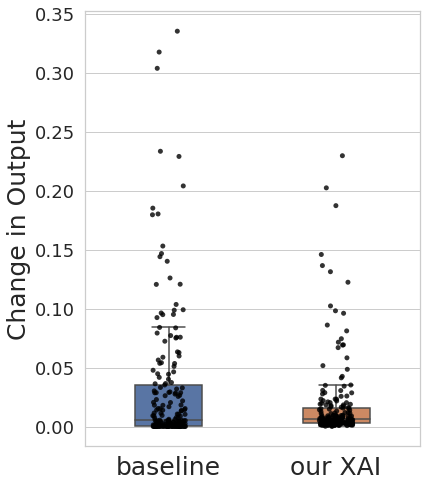

In [77]:
plt.figure(figsize=(6,8))
sns.boxplot(data=df, width=0.4, showfliers=False)
plt.legend('', frameon=False)
#plt.title('Robustness to Artifacts', size=30)
sns.stripplot(data=df, color='black', alpha=0.8)
plt.yticks(size=18)
plt.xticks(size=25)
plt.ylabel('Change in Output', size=25)
plt.title
#plt.savefig("/home/kti01/Documents/My Files/Projects/Overlap/plots/robustness/ruler"+ruler_type+".png", dpi=500, bbox_inches='tight')

In [81]:
#df.to_csv("../Source Data/Extended_Data_Fig1b.csv", index=False)

In [79]:
print(df.baseline.mean())
print(confidence_interval(df.baseline, func=np.mean))

0.03215857625348154
[0.02443029 0.04059865]


In [80]:
print(df['our XAI'].mean())
print(confidence_interval(df['our XAI'], func=np.mean))

0.01843021737955561
[0.01386344 0.02359249]


In [109]:
stats.ttest_rel(df.baseline, df['explanatory AI'])

Ttest_relResult(statistic=2.5985041710136016, pvalue=0.010078321613359087)

<AxesSubplot:>

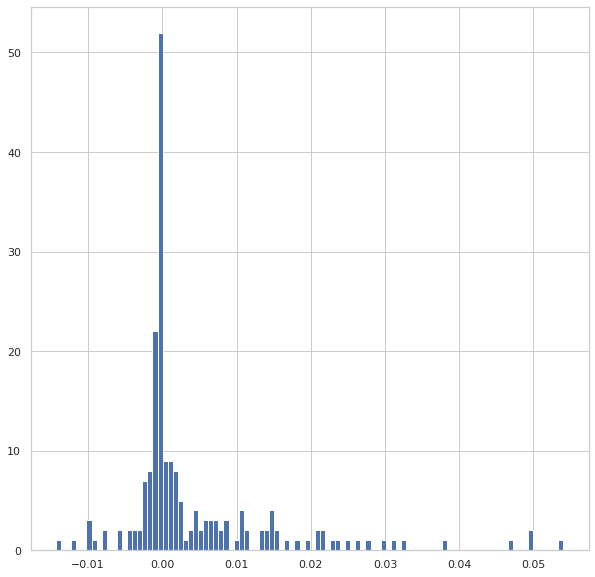

In [89]:
diff = df.baseline - df['explanatory AI']
diff.hist(bins=100)